# <center>Deep Learning with PyTorch : Neural Style Transfer</center>

## We will use the google colab gpu to run this model

![](https://archive.org/download/deep-learning-with-py-torch/Deep%20Learning%20with%20PyTorch.png)

In [ ]:
# First install the pytorch library in the colab server

!pip install torch torchvision

In [ ]:
# clone the repostary from github to get the photos

!git clone https://github.com/parth1620/Project-NST.git

fatal: destination path 'Project-NST' already exists and is not an empty directory.


## Now we will Loading the VGG Pretrained Model available in the pytorch library

In [ ]:
# import the libraries

import torch
from torchvision import models

# from models module import vgg19 model
vgg = models.vgg19(pretrained = True)
print(vgg)

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padd

In [1]:
# since we only required the features sequential model layers,
# since we only extract the features from the target image

vgg = vgg.features
print(vgg)

NameError: name 'vgg' is not defined

In [ ]:
# since we don't need to update the weights of the neural network of the models thus we are freezing the updating process

for parameters in vgg.parameters():
  parameters.requires_grad_(False)

In [ ]:
# Change the device from cpu to gpu

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)

cuda


In [ ]:
# transfer the vgg model to the gpu

vgg.to(device)

Sequential(
  (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (1): ReLU(inplace=True)
  (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (3): ReLU(inplace=True)
  (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (6): ReLU(inplace=True)
  (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (8): ReLU(inplace=True)
  (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (11): ReLU(inplace=True)
  (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (13): ReLU(inplace=True)
  (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (15): ReLU(inplace=True)
  (16): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (17): ReLU(inplace=True)
  (18): MaxPoo

## Now Let's Preprocess the image

In [ ]:
# import the python image ligrary

from PIL import Image
from torchvision import transforms as T

# define a function to preprocess our image

def preprocess(image_path,max_size = 500):

  image = Image.open(image_path).convert("RGB")

  if max(image.size) > max_size :
    size = max_size

  else :
    size = max(image.size)

  # convert the image format into tensor format

  image_transform = T.Compose([
                               
                               T.Resize(size),
                               T.ToTensor(),
                               T.Normalize(mean = [0.485, 0.456, 0.406], # this is for the vgg model sepicific values
                                           std = [0.229, 0.224, 0.225])
  ])

  image = image_transform(image)

  image = image.unsqueeze(0) # (3,224,224) -> (1,3,224,224)

  return image

In [ ]:
# preprocess the style image and the content image

content_p = preprocess("/content/Project-NST/content11.jpg")
style_p = preprocess("/content/Project-NST/style12.jpg")

content_p = content_p.to(device)
style_p = style_p.to(device)

# print the image shape

print('Content Shape',content_p.shape)
print('Style Shape',style_p.shape)

Content Shape torch.Size([1, 3, 259, 345])
Style Shape torch.Size([1, 3, 625, 500])


## We need to Deprocess the processed image also to show it as an output

In [ ]:
# import numpy and matplotlib libraries

import numpy as np
import matplotlib.pyplot as plt

# function to deprocess the preprocessed image

def deprocess(tensor):
  image = tensor.to('cpu').clone() # it is to make a copy
  image = image.numpy() # convert the format into numpy
  image = image.squeeze(0) # (1,3,224,224) -> (3,224,224)
  image = image.transpose(1,2,0) # (3,224,224) -> (224,224,3)
  image = image * np.array([0.229, 0.224, 0.225]) + np.array([0.485, 0.456, 0.406])
  image = image.clip(0,1) 

  return image

In [ ]:
# deprocess the preprocessed images

content_d = deprocess(content_p)
style_d = deprocess(style_p)

# print these images shape
print("Deprocess content : ", content_d.shape)
print("Deprocess Style : ", style_d.shape)

Deprocess content :  (259, 345, 3)
Deprocess Style :  (625, 500, 3)


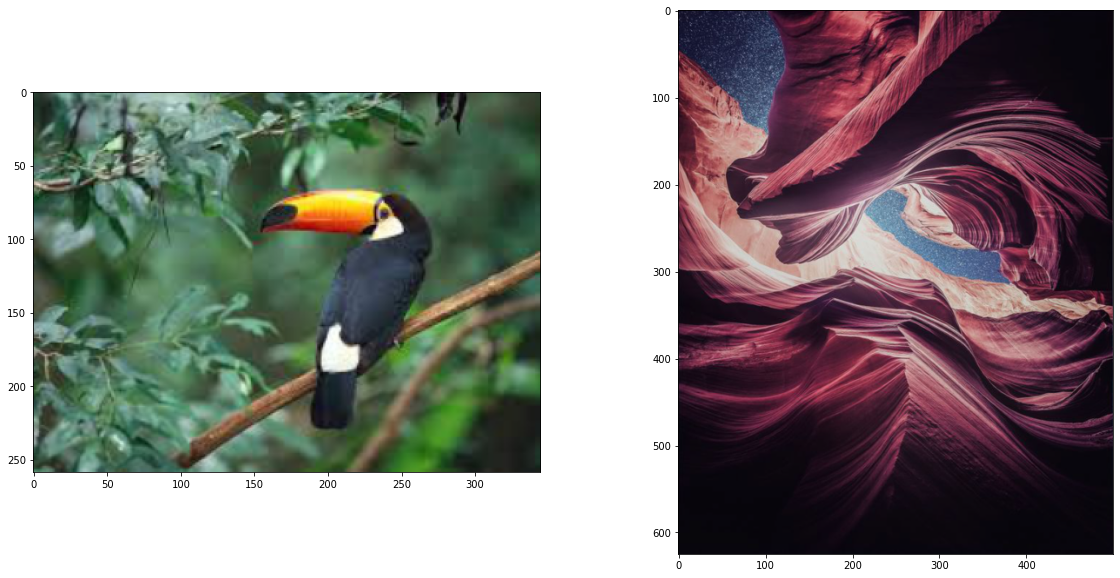

In [ ]:
# plot these images as the output using matplotlib

fig, (ax1,ax2) = plt.subplots(1,2, figsize = (20,10))
ax1.imshow(content_d)
ax2.imshow(style_d)

## Now Get content,style features and create gram matrix

In [ ]:
# function to extract the features

def get_feature(image,model):

  layers = {
      '0' : 'conv1_1', # style features
      '5' : 'conv2_1', # style features
      '10' : 'conv3_1', # style features
      '19' : 'conv4_1', # style features
      '21' : 'conv4_2', # content_feature
      '28' : 'conv5_1' # style features

  }

  x = image

  Features = {}

  for name,layer in model._modules.items():

    x = layer(x)

    if name in layers:
      Features[layers[name]] = x

  return Features

In [ ]:
# extract the features from the images

content_f = get_feature(content_p, vgg)
style_f = get_feature(style_p,vgg)

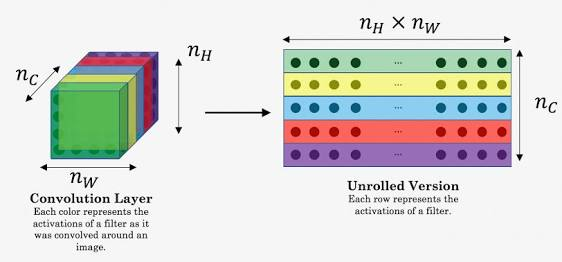

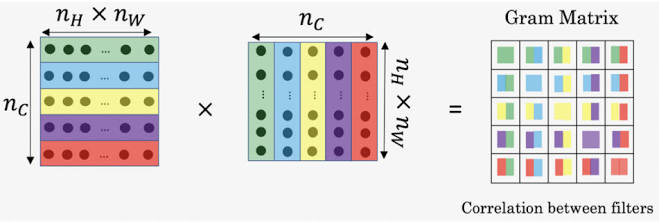

In [ ]:
# function to generate the gram matrix 

def gram_matrix(tensor):

  b,c,h,w = tensor.size()
  tensor = tensor.view(c,h*w)
  gram = torch.mm(tensor,tensor.t())
  return gram

In [ ]:
# generate the gram matrix of style features

style_gram = {layer : gram_matrix(style_f[layer]) for layer in style_f}

## Now Creating Style and Content loss function

In [ ]:
# function to get the content loss

def content_loss(target_conv4_2,content_conv4_2):

  loss = torch.mean((target_conv4_2-content_conv4_2)**2)
  return loss

In [ ]:
# weights for the style 

style_weights = {
    "conv1_1" : 1.0,
    'conv2_1' : 0.75,
    'conv3_1' : 0.2,
    'conv4_1' : 0.2,
    'conv5_1' : 0.2

}

In [ ]:
# function to generate the style loss

def style_loss(style_weights,target_features,style_grams):

  loss = 0

  for layer in style_weights :
    target_f = target_features[layer]
    target_gram = gram_matrix(target_f) # gram matrix of the target image
    style_gram = style_grams[layer] # gram matrix of the style image
    b,c,h,w = target_f.shape
    layer_loss = style_weights[layer] * torch.mean((target_gram - style_gram)**2)
    loss += layer_loss/(c*h*w)
  return loss

In [ ]:
target = content_p.clone().requires_grad_(True).to(device)
target_f = get_feature(target,vgg) 
print("content loss : ", content_loss(target_f["conv4_2"],content_f["conv4_2"]))
print("style loss : ", style_loss(style_weights,target_f,style_gram))

content loss :  tensor(0., device='cuda:0', grad_fn=<MeanBackward0>)
style loss :  tensor(1790.8411, device='cuda:0', grad_fn=<AddBackward0>)


## Apply all in the Training loop

In [ ]:
from torch import optim

optimizer = optim.Adam([target],lr = 0.03)

# Hyper parameters

alpha = 1
beta = 1e5

epoch = 3000

show_every = 500

In [ ]:
# function to generate total loss

def total_loss(c_loss,s_loss,alpha,beta):
  loss = alpha*c_loss + beta * s_loss
  return loss

In [ ]:
result = []

# Run the model

for i in range(epoch):

  target_f = get_feature(target,vgg)

  c_loss = content_loss(target_f['conv4_2'],content_f['conv4_2'])
  s_loss = style_loss(style_weights,target_f,style_gram)
  t_loss = total_loss(c_loss,s_loss,alpha,beta)

  optimizer.zero_grad()
  t_loss.backward()
  optimizer.step()

  if i % show_every == 0 :
    print("Toatal Loss at Epoch {} : {}".format(i,t_loss)) # print the loss
    result.append(deprocess(target.detach()))

Toatal Loss at Epoch 0 : 179084112.0
Toatal Loss at Epoch 500 : 6914141.5
Toatal Loss at Epoch 1000 : 4904419.0
Toatal Loss at Epoch 1500 : 4274524.5
Toatal Loss at Epoch 2000 : 3958184.5
Toatal Loss at Epoch 2500 : 3755794.5


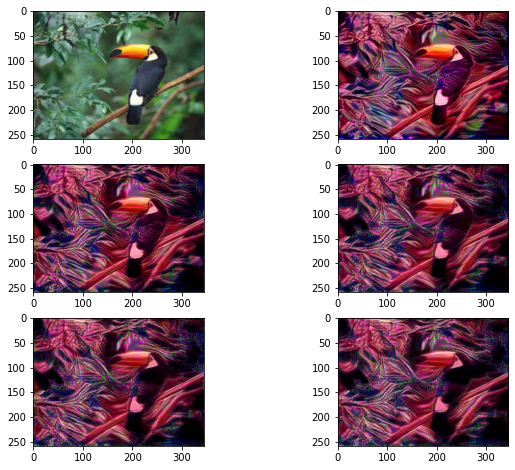

In [ ]:
# show the image after every 500 iteration 

plt.figure(figsize = (10,8))

for i in range(len(result)):

  plt.subplot(3,2,1+i)
  plt.imshow(result[i])

plt.show()

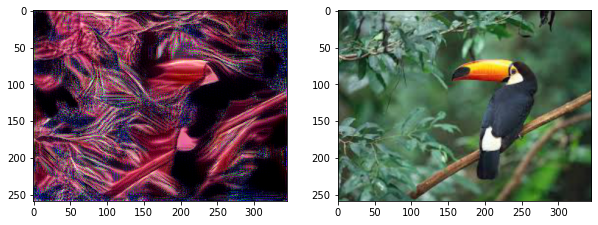

In [ ]:
# final updated image

target_copy = deprocess(target.detach())
content_copy = deprocess(content_p)

fig, (ax1,ax2) = plt.subplots(1,2,figsize = (10,5))
ax1.imshow(target_copy)
ax2.imshow(content_copy)